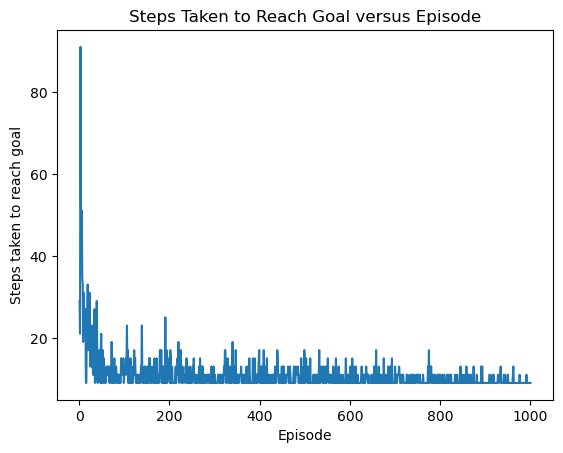

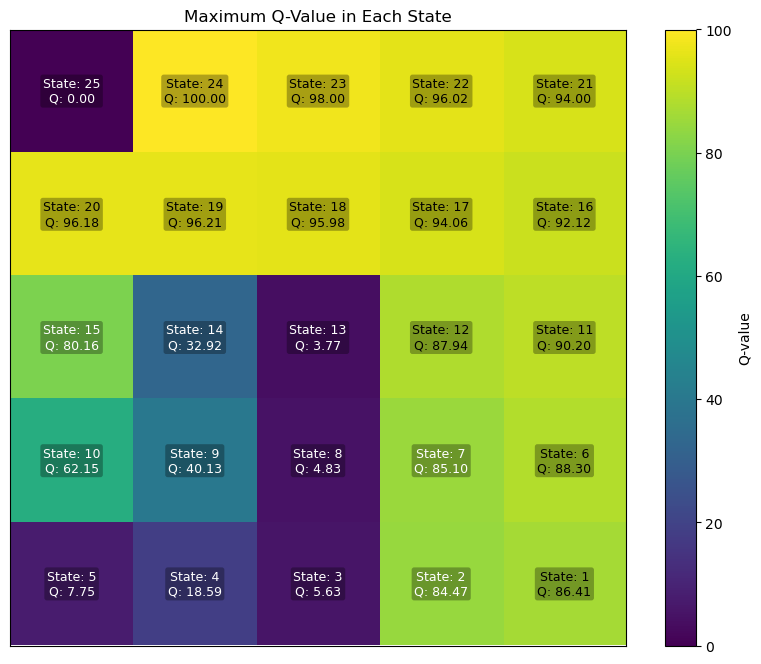

{1: [86.41306958139761, 0.0, 82.08758731068829, 0.0], 2: [6.355209735962952, 0.0, 0.4908612875670724, 84.46783554096586], 3: [-0.9938311591842273, 0.0, 5.633597015721502, -0.9528987130275376], 4: [18.58750881439189, 0.0, -0.3299929952566702, -0.7712320754503901], 5: [7.7540144368667505, 0.0, 0.0, -0.5217031000000001], 6: [88.29602988019967, 83.3027623758199, 77.20783638729137, 0.0], 7: [6.733049997023304, 19.241960953344105, -0.7155455999454484, 85.0961661498008], 8: [-8.1399, -0.6513215599000001, 4.828050860661078, -0.6284932159591], 9: [-3.0, 1.41219526772412, 40.13394184106276, -0.5006290159000001], 10: [62.15420575932934, -0.25306653608244617, 0.0, 3.8576691771417444], 11: [90.19800997999975, 85.83929913311071, 74.9429853139958, 0.0], 12: [8.624150453689982, 18.35610820847993, -8.148810000000001, 87.93762128456302], 13: [-0.22369305097, -0.23507941011094913, 3.7699430802182077, -0.1314423316801], 14: [32.9213013412608, -0.19, -0.1, -0.1099], 15: [80.15577163305656, 10.9283300400911

In [ ]:
#below is the Q-learning method with the same discrete 5 by 5 grid world
#we will see in the results that the Q-learning method converges faster and is more stable than the Monte Carlo method
import random
import matplotlib.pyplot as plt
import numpy as np

# Environment representation
environment = [
    [25, 24, 23, 22, 21],
    [20, 19, 18, 17, 16],
    [15, 14, 13, 12, 11],
    [10, 9, 8, 7, 6],
    [5, 4, 3, 2, 1]
]

# Initialize Q-table with uniformly distributed values between 110 and 120
states = list(range(1, 26))
q_table = {state: [0.0 for _ in range(4)] for state in states}

# Directions: up, down, left, right
direction = [5, -5, 1, -1]

# Initial position
S0 = 1
next_state = S0

def decision(start_state):
    if start_state == 1:
        q_value_options = [q_table[start_state][i] for i in [0,2]]
        allowable_movement = [0,2]    
    elif start_state == 5:
        q_value_options = [q_table[start_state][i] for i in [0,3]]
        allowable_movement = [0,3]
    elif start_state == 21:
        q_value_options = [q_table[start_state][i] for i in [1,2]]
        allowable_movement = [1,2]
    elif start_state in (6,11,16):
        q_value_options = [q_table[start_state][i] for i in [0,1,2]]
        allowable_movement = [0,1,2]
    elif start_state in (2,3,4):
        q_value_options = [q_table[start_state][i] for i in [0,2,3]]
        allowable_movement = [0,2,3]
    elif start_state in (10,15,20):
        q_value_options = [q_table[start_state][i] for i in [0,1,3]]
        allowable_movement = [0,1,3]
    elif start_state in (22,23,24):
        q_value_options = [q_table[start_state][i] for i in [1,2,3]]
        allowable_movement = [1,2,3]
    else:
        q_value_options = [q_table[start_state][i] for i in [0,1,2,3]]
        allowable_movement = [0,1,2,3]
    
    determination = 0.8 + iteration*(1/1000)*0.15
    if random.random() < determination:
        return allowable_movement[q_value_options.index(max(q_value_options))]
    else:
        return random.choice(allowable_movement)
    

def action_reward(start_state, next_state):
    if next_state == 25:
        return 100
    elif next_state in (13, 14, 18, 19) and start_state not in (13, 14, 18, 19):
        return -30
    else:
        return -1

graph_step = []
graph_iteration = list(range(1, 1001))
alpha = 0.1  # learning rate
gamma = 0.99  # discount rate
overstep_penalty = -10

for iteration in range(1000):
    start_state = 1
    step_memory = {}
    step = 1

    while start_state < 25:
        movement = decision(start_state)
        next_state = start_state + direction[movement]
        reward = action_reward(start_state, next_state)
        step_memory[step] = [next_state, start_state, movement]

        if next_state == 25:
            target = reward  # Terminal state has no future rewards
        else:
            target = reward + gamma * max(q_table[next_state])

        q_table[start_state][movement] = (1 - alpha) * q_table[start_state][movement] + alpha * target
        start_state = next_state
        step += 1
        if step > 200:
            break

    graph_step.append(step)

# Plot the number of steps taken to reach the goal over iterations
plt.plot(graph_iteration, graph_step)
plt.xlabel("Episode")
plt.ylabel("Steps taken to reach goal")
plt.title("Steps Taken to Reach Goal versus Episode")
plt.show()


# Extract the maximum Q-value for each state
max_q_values = {state: max(q_table[state]) for state in states}
max_q_grid = np.zeros((5, 5))

for i, row in enumerate(environment):
    for j, state in enumerate(row):
        max_q_grid[i, j] = max_q_values[state]

# Create and display the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(max_q_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title("Maximum Q-Value in Each State")

# Add text annotations to each cell with state number and Q-value
for i in range(5):
    for j in range(5):
        state_num = environment[i][j]
        q_val = max_q_grid[i, j]
        # Use white text for darker backgrounds, black for lighter
        text_color = 'white' if q_val < np.median(max_q_grid) else 'black'
        plt.text(j, i, 
                 f"State: {state_num}\nQ: {q_val:.2f}", 
                 ha="center", 
                 va="center",
                 color=text_color,
                 fontsize=9,
                 bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle='round,pad=0.2'))

plt.xticks([])
plt.yticks([])
plt.show()



print(q_table)
print(f"Final Steps taken: {list(step_memory.keys())[-1]}\nFinal Path taken: {[value[0] for value in step_memory.values()]}")